In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [3]:
trainset=pd.read_csv('train.csv')
trainset.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424000


In [4]:
testset=pd.read_csv('test.csv')
testset.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID
0,604373,Manuel d'Héliogravure Et de Photogravure En Re...,NaN,NaN,6142
1,1729783,DCGARING Microfiber Throw Blanket Warm Fuzzy P...,[QUALITY GUARANTEED: Luxury cozy plush polyest...,<b>DCGARING Throw Blanket</b><br><br> <b>Size ...,1622
2,1871949,I-Match Auto Parts Front License Plate Bracket...,"[Front License Plate Bracket Made Of Plastic,D...",Replacement for The Following Vehicles:2020 LE...,7540
3,1107571,PinMart Gold Plated Excellence in Service 1 Ye...,[Available as a single item or bulk packed. Se...,Our Excellence in Service Lapel Pins feature a...,12442
4,624253,"Visual Mathematics, Illustrated by the TI-92 a...",NaN,NaN,6318


In [5]:
sampleset=pd.read_csv('sample.csv')
sampleset.head()

,PRODUCT_ID,PRODUCT_LENGTH
0,604373,701.093794
1,1729783,734.506163
2,1871949,741.360258
3,1107571,730.327767
4,624253,666.847946


In [34]:
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove HTML tags
    text = re.sub('<[^>]*>', '', text)
    # Remove non-ASCII characters
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    # Remove emojis
    text = re.sub(':[^:]+:', '', text)
    # Remove extra whitespaces
    text = re.sub('\s+', ' ', text).strip()
    # remove stopwords
    text = [word for word in text.split() if word not in stop_words]
    return text

In [35]:
trainset.duplicated("TITLE").sum()

38935

In [37]:
#Removing them
trainset.drop_duplicates("TITLE")

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424000
...,...,...,...,...,...,...
2249693,2422167,Nike Women's As W Ny Df Swsh Hn Kh Bra (CZ7610...,Material : Polyester,NaN,3009,1181.100000
2249694,2766635,"(3PCS) Goose Game Cute Cartoon Enamel Pins, Fu...",[❤ [Inspiration] Inspired by the Untitled Goos...,<p><b>[Brand]: </b>XVIEONR</p> <p><br></p> <p>...,3413,125.984252
2249695,1987786,Kangroo Sweep Movement Printed Wooden Wall Clo...,"[Dial size: 12 inches in diameter,Big, clear r...",Wall Clocks Are Very Attractive In Looks And E...,1574,1200.000000
2249696,1165754,Electro Voice EKX-BRKT15 | Wall Mount Bracket ...,NaN,NaN,592,2900.000000


In [39]:
trainset.shape

(2249698, 6)

In [41]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2249698 entries, 0 to 2249697
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   PRODUCT_ID       int64  
 1   TITLE            object 
 2   BULLET_POINTS    object 
 3   DESCRIPTION      object 
 4   PRODUCT_TYPE_ID  int64  
 5   PRODUCT_LENGTH   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 103.0+ MB


In [50]:
backup = trainset #backing up
backup_test = testset

In [46]:
trainset["BULLET_POINTS"] = trainset["BULLET_POINTS"].fillna("")
trainset["DESCRIPTION"] = trainset["DESCRIPTION"].fillna("")

In [48]:
trainset

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,,,6112,598.424000
...,...,...,...,...,...,...
2249693,2422167,Nike Women's As W Ny Df Swsh Hn Kh Bra (CZ7610...,Material : Polyester,,3009,1181.100000
2249694,2766635,"(3PCS) Goose Game Cute Cartoon Enamel Pins, Fu...",[❤ [Inspiration] Inspired by the Untitled Goos...,<p><b>[Brand]: </b>XVIEONR</p> <p><br></p> <p>...,3413,125.984252
2249695,1987786,Kangroo Sweep Movement Printed Wooden Wall Clo...,"[Dial size: 12 inches in diameter,Big, clear r...",Wall Clocks Are Very Attractive In Looks And E...,1574,1200.000000
2249696,1165754,Electro Voice EKX-BRKT15 | Wall Mount Bracket ...,,,592,2900.000000


In [51]:
testset["BULLET_POINTS"] = testset["BULLET_POINTS"].fillna("")
testset["DESCRIPTION"] = testset["DESCRIPTION"].fillna("")

In [52]:
testset

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID
0,604373,Manuel d'Héliogravure Et de Photogravure En Re...,,,6142
1,1729783,DCGARING Microfiber Throw Blanket Warm Fuzzy P...,[QUALITY GUARANTEED: Luxury cozy plush polyest...,<b>DCGARING Throw Blanket</b><br><br> <b>Size ...,1622
2,1871949,I-Match Auto Parts Front License Plate Bracket...,"[Front License Plate Bracket Made Of Plastic,D...",Replacement for The Following Vehicles:2020 LE...,7540
3,1107571,PinMart Gold Plated Excellence in Service 1 Ye...,[Available as a single item or bulk packed. Se...,Our Excellence in Service Lapel Pins feature a...,12442
4,624253,"Visual Mathematics, Illustrated by the TI-92 a...",,,6318
...,...,...,...,...,...
734731,921419,"Casual Canine Basic Hoodie for Dogs, 16"" Mediu...",[Brightly colored pet sweatshirts with authent...,"ZA6015 16 43 Size-See Chart Below: Medium: 16""...",7073
734732,2456362,Dive Log Book: Scuba Diving Logbook for Beginn...,,,1
734733,841529,Axor 39135001 Citterio Widespread Faucet with ...,"[8-Inch centers,1/2-Inch IPS inlets,9-Inch spo...",39135001 Features: -ADA compliant. -Includes p...,10645
734734,1190194,Caroline's Treasures BB1801DS812 Halloween Bas...,"[Indoor or outdoor aluminum artwork prints,8 i...",Features. Great for inside or outside these Al...,12680


In [54]:
trainset.describe()

,PRODUCT_ID,PRODUCT_TYPE_ID,PRODUCT_LENGTH
count,2.249698e+06,2.249698e+06,2.249698e+06
mean,1.499795e+06,4.000456e+03,4.071839e+03
std,8.661944e+05,3.966146e+03,1.351685e+06
min,1.000000e+00,0.000000e+00,1.000000e+00
25%,7.494795e+05,2.300000e+02,5.118110e+02
50%,1.499558e+06,2.916000e+03,6.630000e+02
75%,2.250664e+06,6.403000e+03,1.062992e+03
max,2.999999e+06,1.342000e+04,1.885801e+09


In [56]:
trainset = trainset[trainset["PRODUCT_LENGTH"] < 10e+4]
trainset = trainset[trainset["PRODUCT_LENGTH"] > 10]

In [58]:
trainset.describe()

,PRODUCT_ID,PRODUCT_TYPE_ID,PRODUCT_LENGTH
count,2.237585e+06,2.237585e+06,2.237585e+06
mean,1.498293e+06,3.998647e+03,1.159706e+03
std,8.666531e+05,3.967548e+03,2.403530e+03
min,1.000000e+00,0.000000e+00,1.023622e+01
25%,7.463040e+05,2.300000e+02,5.200000e+02
50%,1.498930e+06,2.916000e+03,6.690000e+02
75%,2.249409e+06,6.396000e+03,1.062992e+03
max,2.999999e+06,1.342000e+04,9.990000e+04


In [73]:
#Escaping out HTML characters
import re
CLEANR = re.compile('<.*?>') 

def cleanhtml(raw_html):
  cleantext = re.sub(CLEANR, '', raw_html)
  return cleantext

trainset["DESCRIPTION"] = trainset["DESCRIPTION"].apply(cleanhtml)
trainset["BULLET_POINTS"] = trainset["BULLET_POINTS"].apply(cleanhtml)

In [65]:
trainset

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,,,6112,598.424000
...,...,...,...,...,...,...
2249693,2422167,Nike Women's As W Ny Df Swsh Hn Kh Bra (CZ7610...,Material : Polyester,,3009,1181.100000
2249694,2766635,"(3PCS) Goose Game Cute Cartoon Enamel Pins, Fu...",[ [Inspiration] Inspired by the Untitled Goose...,[Brand]: XVIEONR [Product name]: Fashion cute...,3413,125.984252
2249695,1987786,Kangroo Sweep Movement Printed Wooden Wall Clo...,"[Dial size: 12 inches in diameter,Big, clear r...",Wall Clocks Are Very Attractive In Looks And E...,1574,1200.000000
2249696,1165754,Electro Voice EKX-BRKT15 | Wall Mount Bracket ...,,,592,2900.000000


In [75]:
#Encode from UTF-8 to ascii
def encode_decode(html):
    encode =html.encode('ascii','ignore')

    #decode from ascii to UTF-8
    decode=encode.decode(encoding='UTF-8')
    return decode

trainset["BULLET_POINTS"] = trainset["BULLET_POINTS"].apply(encode_decode)
trainset["DESCRIPTION"] = trainset["DESCRIPTION"].apply(encode_decode)

In [78]:
#library for regular expressions
import re

def regexx(tweet):
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.\S+', "", tweet)

    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)

    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    return tweet

trainset["DESCRIPTION"] = trainset["DESCRIPTION"].apply(regexx)
trainset["BULLET_POINTS"] = trainset["BULLET_POINTS"].apply(regexx)

In [79]:
#dictionary consisting of the contraction and the actual value
def apos(tweet):
    Apos_dict={"'s":" is","n't":" not","'m":" am","'ll":" will",
            "'d":" would","'ve":" have","'re":" are"}

    #replace the contractions
    for key,value in Apos_dict.items():
        if key in tweet:
            tweet=tweet.replace(key,value)

    return tweet

trainset["DESCRIPTION"] = trainset["DESCRIPTION"].apply(apos)
trainset["BULLET_POINTS"] = trainset["BULLET_POINTS"].apply(apos)

In [84]:
#dictionary consisting of the contraction and the actual value
def apos(tweet):
    Apos_dict={"'s":" is","n't":" not","'m":" am","'ll":" will",
            "'d":" would","'ve":" have","'re":" are"}

    #replace the contractions
    for key,value in Apos_dict.items():
        if key in tweet:
            tweet=tweet.replace(key,value)

    return tweet

trainset["DESCRIPTION"] = trainset["DESCRIPTION"].apply(apos)
trainset["BULLET_POINTS"] = trainset["BULLET_POINTS"].apply(apos)

In [86]:
import re
#separate the words
def split(tweet):
    tweet = " ".join([s for s in re.split("([A-Z][a-z]+[^A-Z]*)",tweet) if s])
    return tweet

trainset["DESCRIPTION"] = trainset["DESCRIPTION"].apply(split)
trainset["BULLET_POINTS"] = trainset["BULLET_POINTS"].apply(split)

In [80]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
#stop words
stop_words = set(stopwords.words('english'))
remove_stop_words = lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])

In [89]:
#convert to lower case
def lower(tweet):
    tweet=tweet.lower()
    return tweet

trainset["DESCRIPTION"] = trainset["DESCRIPTION"].apply(lower)
trainset["BULLET_POINTS"] = trainset["BULLET_POINTS"].apply(lower)

In [88]:
import nltk
def stopw(tweet):
    #download the stopwords from nltk using
    nltk.download('stopwords')
    #import stopwords
    from nltk.corpus import stopwords

    #import english stopwords list from nltk
    stopwords_eng = stopwords.words('english')

    tweet_tokens=tweet.split()
    tweet_list=[]
    #remove stopwords
    for word in tweet_tokens:
        if word not in stopwords_eng:
            tweet_list.append(word)

    return tweet_list

In [90]:
#for string operations
import string	
def removepunc(tweet_list):	
  clean_tweet=[]
  #remove punctuations
  for word in tweet_list:
    if word not in string.punctuation:
      clean_tweet.append(word)

  return clean_tweet

In [94]:
#make a new column called text
trainset["text"] = trainset["BULLET_POINTS"] + trainset["DESCRIPTION"]
remove_symbols = lambda x: re.sub(r'[^\w\s]', '', x)
trainset['text'] = trainset['text'].apply(remove_symbols)
trainset["text"][0]

'luxurious  appealing  beautiful custommade curtains to decorate any home or office   includes inbuilt tieback to hold the curtain   completely finished and ready to hang on walls  windows material  luxurious  versatile fabric with a natural finish   high colour fastness   stateoftheart digital printing ensures colour consistency and prevents any fading   eyelets  cotton  canvas  width 45feet 54inch   multicolour   package 2  room  curtains  eyelets   size  height 5 feet 60 inch  set of 2 pcsblackout curtain 100 opaque  heavy premium cotton canvas fabric   tight knitted long life  durable fabric   printing only on front side with a plain colour back side made to perfection  large eyelets at the top to put hanging hooks   perfectly tailored seams for durability   refined stitching with a matching thread color quality assured  gentle wash with similar colors in cold water   avoid direct sunlight to prevent fading   dispatched after  multiple quality checks'

In [97]:
trainset['text'] = trainset['text'].apply(remove_stop_words)
trainset = trainset.drop(['TITLE', 'DESCRIPTION', 'BULLET_POINTS'], axis=1)
trainset = trainset.reset_index(drop = True)
trainset

,PRODUCT_ID,PRODUCT_TYPE_ID,PRODUCT_LENGTH,text
0,1925202,1650,2125.980000,luxurious appealing beautiful custommade curta...
1,2673191,2755,393.700000,harry potter hedwig pyjamas 616 yrs100 cotton ...
2,2765088,7537,748.031495,loud dual tone trumpet horn compatible sx4 ele...
3,1594019,2996,787.401574,made 95cotton 5 lycra gives 4 ways stretchable...
4,283658,6112,598.424000,
...,...,...,...,...
2237580,2422167,3009,1181.100000,material polyester
2237581,2766635,3413,125.984252,inspiration inspired untitled goose game brooc...
2237582,1987786,1574,1200.000000,dial size 12 inches diameter big clear represe...
2237583,1165754,592,2900.000000,


In [ ]:
trainset.to_csv("cleaned_train.csv",index=False)

In [ ]:
backup = trainset
backup_test = testset
testset

In [99]:
testset["BULLET_POINTS"] = testset["BULLET_POINTS"].fillna("")
testset["DESCRIPTION"] = testset["DESCRIPTION"].fillna("")
testset["TITLE"] = testset["TITLE"].fillna("")

testset["DESCRIPTION"] = testset["DESCRIPTION"].apply(cleanhtml)
testset["BULLET_POINTS"] = testset["BULLET_POINTS"].apply(cleanhtml)
testset["TITLE"] = testset["TITLE"].apply(cleanhtml)

testset["BULLET_POINTS"] = testset["BULLET_POINTS"].apply(encode_decode)
testset["DESCRIPTION"] = testset["DESCRIPTION"].apply(encode_decode)
testset["TITLE"] = testset["TITLE"].apply(encode_decode)

testset["DESCRIPTION"] = testset["DESCRIPTION"].apply(regexx)
testset["BULLET_POINTS"] = testset["BULLET_POINTS"].apply(regexx)
testset["TITLE"] = testset["TITLE"].apply(regexx)

testset["DESCRIPTION"] = testset["DESCRIPTION"].apply(apos)
testset["BULLET_POINTS"] = testset["BULLET_POINTS"].apply(apos)
testset["TITLE"] = testset["TITLE"].apply(apos)

testset["DESCRIPTION"] = testset["DESCRIPTION"].apply(split)
testset["BULLET_POINTS"] = testset["BULLET_POINTS"].apply(split)
testset["TITLE"] = testset["TITLE"].apply(split)

testset["DESCRIPTION"] = testset["DESCRIPTION"].apply(lower)
testset["BULLET_POINTS"] = testset["BULLET_POINTS"].apply(lower)
testset["TITLE"] = testset["TITLE"].apply(lower)

testset["text"] = testset["TITLE"] + testset["BULLET_POINTS"] + testset["DESCRIPTION"]

testset['text'] = testset['text'].apply(remove_symbols)

testset['text'] = testset['text'].apply(remove_stop_words)



In [100]:
testset= testset.drop(['TITLE', 'DESCRIPTION', 'BULLET_POINTS'], axis=1)
testset

,PRODUCT_ID,PRODUCT_TYPE_ID,text
0,604373,6142,manuel hliogravure et de photogravure en relie...
1,1729783,1622,dcgaring microfiber throw blanket warm fuzzy p...
2,1871949,7540,match auto parts front license plate bracket t...
3,1107571,12442,pin mart gold plated excellence service 1 year...
4,624253,6318,visual mathematics illustrated ti92 ti89
...,...,...,...
734731,921419,7073,casual canine basic hoodie dogs 16 medium gree...
734732,2456362,1,dive log book scuba diving logbook beginner ex...
734733,841529,10645,axor 39135001 citterio widespread faucet lever...
734734,1190194,12680,caroline treasures bb1801ds812 halloween basse...


In [102]:
testset.to_csv("cleaned_test.csv",index=False)

In [105]:
s=pd.read_csv('sample.csv')
s

,PRODUCT_ID,PRODUCT_LENGTH
0,604373,701.093794
1,1729783,734.506163
2,1871949,741.360258
3,1107571,730.327767
4,624253,666.847946
...,...,...
734731,921419,733.838809
734732,2456362,746.810825
734733,841529,691.127128
734734,1190194,757.643591


In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [108]:
X = trainset.drop(columns=["PRODUCT_ID","PRODUCT_LENGTH"])
y = trainset["PRODUCT_LENGTH"]
X_test = testset[["PRODUCT_TYPE_ID","text"]]

In [110]:
y_test = s["PRODUCT_LENGTH"]

In [112]:
y_test = y_test.astype("float16")
y_test

0         701.0
1         734.5
2         741.5
3         730.5
4         667.0
          ...  
734731    734.0
734732    747.0
734733    691.0
734734    757.5
734735    754.0
Name: PRODUCT_LENGTH, Length: 734736, dtype: float16

In [113]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
# from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [ ]:
y_pred = pipe.predict(X_test)

In [119]:
trainset.head()

,PRODUCT_ID,PRODUCT_TYPE_ID,PRODUCT_LENGTH,text
0,1925202,1650,2125.980000,luxurious appealing beautiful custommade curta...
1,2673191,2755,393.700000,harry potter hedwig pyjamas 616 yrs100 cotton ...
2,2765088,7537,748.031495,loud dual tone trumpet horn compatible sx4 ele...
3,1594019,2996,787.401574,made 95cotton 5 lycra gives 4 ways stretchable...
4,283658,6112,598.424000,


In [121]:
# Split the data into input features (X) and target variable (y)
X_train = trainset.drop(['PRODUCT_LENGTH'], axis=1)
y_train = trainset['PRODUCT_LENGTH']
X_test = testset

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

SyntaxError: invalid syntax (1654466089.py, line 2)

In [31]:
model.score(X_test,y_test)

1.0

In [ ]:
df = pd.DataFrame(test_data["PRODUCT_ID"])

# Add a new column with the y_pred values
df["y_pred"] = y_pred

# Set the column names
df.columns = ["PRODUCT_ID", "PRODUCT_LENGTH"]

In [56]:
# Check for missing values in the train DataFrame
print("Train Data Number of Null values: ")
print(trainset.isnull().sum())

print("\n")

# Check for missing values in the test DataFrame
print("Test Data Number of Null values: ")
print(testset.isnull().sum())

Train Data Number of Null values: 
PRODUCT_ID         0
TITLE              0
BULLET_POINTS      0
DESCRIPTION        0
PRODUCT_TYPE_ID    0
PRODUCT_LENGTH     0
dtype: int64


Test Data Number of Null values: 
PRODUCT_ID              0
TITLE                   5
BULLET_POINTS      275922
DESCRIPTION        380001
PRODUCT_TYPE_ID         0
dtype: int64


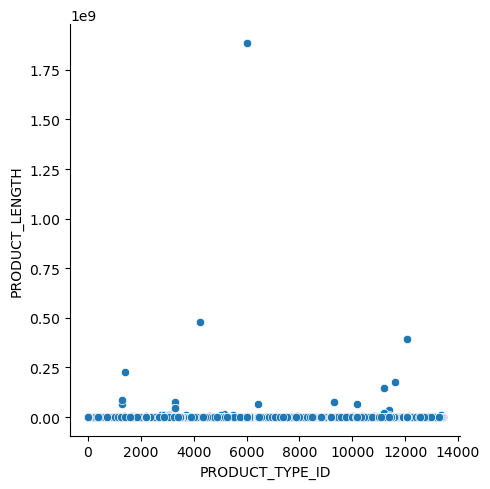

In [50]:
sns.relplot(x='PRODUCT_LENGTH', y='PRODUCT_TYPE_ID',data=trainset)
plt.show()

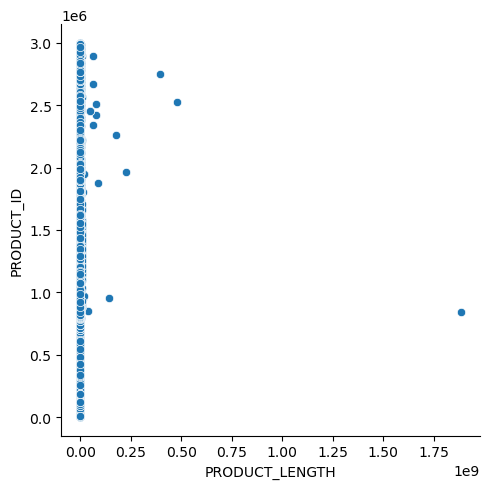

In [49]:
sns.relplot(x='PRODUCT_LENGTH', y='PRODUCT_ID',data=trainset)
plt.show()

In [51]:
trainset.tail()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
2249686,1898841,Cocomii Holographic iPhone 11 Pro Case - Holog...,"[COCOMII - UNIQUE, STYLISH, QUALITY: This beau...",<b>COCOMII</b><br><br>We transform amazing ide...,12556,600.000000
2249689,1616561,Have It Tall Men's Curved Hem Long Drop Tail T...,[Light Weight 65% Polyester/ 35% Ring Spun Cot...,This extra long Tall t-Shirt will be your favo...,2879,1200.000000
2249694,2766635,"(3PCS) Goose Game Cute Cartoon Enamel Pins, Fu...",[❤ [Inspiration] Inspired by the Untitled Goos...,<p><b>[Brand]: </b>XVIEONR</p> <p><br></p> <p>...,3413,125.984252
2249695,1987786,Kangroo Sweep Movement Printed Wooden Wall Clo...,"[Dial size: 12 inches in diameter,Big, clear r...",Wall Clocks Are Very Attractive In Looks And E...,1574,1200.000000
2249697,1072666,Skyjacker C7360SP Component Box For PN[C7360PK...,"[Component Box For PN[C7360PK],4 in. Lift,Incl...",Skyjacker C7360SP Component Box For PN[C7360PK...,7367,2000.000000


In [67]:
from collections import Counter

# Extract the text column as a list
text = trainset['TITLE'].tolist()

# Concatenate all the text into a single string
text = ' '.join(text)

# Split the text into individual words
words = text.split()

# Count the frequency of each word using the Counter function from the collections module
word_counts = Counter(words)

# Print the 10 most common words and their frequencies
top_words = word_counts.most_common(10)
for word, count in top_words:
    print(word, count)

for 473189
with 204271
- 203729
Cover 149139
and 146963
| 115021
of 112033
& 106985
Case 96241
Back 95851
Women's 83901
Printed 83683
Black 71675
Set 69572
x 63013
Women 59524
2 57557
Cotton 53625
Home 50329
Wall 49990
Pack 46330
Size 45554
Soft 43878
Men's 43801
1 42003
Designer 41876
/ 40151
Blue 40114
Girls 39584
Hard 39525
White 39114
Compatible 37919
Car 36869
Samsung 36350
Leather 35645
Galaxy 35531
3 33996
For 33081
in 32049
Room 31680
Plastic 30986
4 30098
Pro 29891
Men 29603
Glass 29264
Sleeve 29108
Light 29051
Decor 29001
Design 28581
6 28328
Kids 28171
Long 27069
Color 27049
Living 27017
Mobile 26872
Gift 26803
iPhone 26753
Casual 26685
Steel 26209
to 25786
Kitchen 25425
Inch 25012
Art 24709
5 24456
Bag 24073
Holder 23708
Dress 23557
Red 23314
Full 22386
Flip 22214
Table 21812
Print 21554
Round 21531
US 21475
X 21312
The 20945
8 20902
Screen 20769
12 20697
Baby 20345
Stainless 20320
Water 20253
10 20232
Storage 20030
Green 19901
Fit 19695
(Pack 19577
Neck 19460
3D 19451
Part

In [59]:
trainset.describe()

,PRODUCT_ID,PRODUCT_TYPE_ID,PRODUCT_LENGTH
count,1.038460e+06,1.038460e+06,1.038460e+06
mean,2.042501e+06,5.170455e+03,6.713314e+03
std,6.280456e+05,3.928656e+03,1.985306e+06
min,8.000000e+00,0.000000e+00,1.000000e+00
25%,1.537351e+06,2.197000e+03,4.330709e+02
50%,2.102976e+06,3.278000e+03,7.086614e+02
75%,2.597901e+06,7.978000e+03,1.200000e+03
max,2.999997e+06,1.342000e+04,1.885801e+09


In [60]:
#filling the null values with empty string
trainset.fillna("", inplace=True)
testset.fillna("", inplace=True)

In [124]:
df = pd.DataFrame(testset["PRODUCT_ID"])

# Add a new column with the y_pred values
df["y_pred"] = y_pred

# Set the column names
df.columns = ["PRODUCT_ID", "PRODUCT_LENGTH"]

In [126]:
sample = pd.read_csv("sample.csv")

In [127]:
df.to_csv("answer.csv", index=False)